# 12 Oct 23 - Activity: Method of Relaxation

As we discussed, we can use the relaxation approach to solve Laplace's equation. As a reminder the process for doing this is as follows:

1. Divide the region into a grid
2. Set the boundary conditions on the edges of the grid
3. Guess the starting values for the potential in the interior of the grid (not on the edges)
4. Calculate the potential at each point in the grid using the average of the neighboring points (replacing the value as you go)
5. Repeat step 4 until the values in the grid stops changing

Below, we have written up a 1D code that performs each of these steps. Your task is to modify this code to work in 2D. You will need to write the functions that compute the potential at each point in the 2D grid as well as the function that sets the boundary conditions. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Dimensional Relaxation

The 1D problem is rather simple in that it produces a linear function -- always. This is because the only solution to the 1D Laplace's equation is a linear function.

$$\frac{d^2V}{dx^2} = 0$$

The solution to this equation is $V(x) = ax + b$. We can use this to test our relaxation code and make sure that it is accurate. In general, you cannot do this and instead need to have some other mechanism for checking the accuracy of your code (like [convergence](https://en.wikipedia.org/wiki/Rate_of_convergence)).

Below, we have written the 1D code as a set of functions.

### Initialize the Grid and set the Boundary Conditions

We wrote two functions `initialize_grid` and `set_boundary_conditions` that initialize a linear grid and also set the boundary conditions. The `initialize_grid` function simply sets all values to zero and then `set_boundary_conditions` sets the values at the edges to the correct values.

In [13]:
def initialize_grid(size):
    ## Set the initial values of the grid
    
    return np.zeros(size)

def set_boundary_conditions(grid, left_val, right_val):
    ## Set the boundary conditions
    grid[0] = left_val
    grid[-1] = right_val
    
    return grid


### Relaxation

The core relaxation function is `run_relaxation`. Notice that it takes in the number of iterations (`num_iterations`); that is, the number of times you want the relaxation algorithm to run. That is, it will calculate the average of the neighboring points fully, and repeat it a limited number of times. 

**This is not how the typical relaxation approach works.**

Normally, you would run the algorithm until the changes between each iteration are below some error tolerance you've chosen. This can lead to (near)infinite loops if your approach: (1) doesn't converge or (2) converges very slowly.  So it is important to have a maximum number of iterations to run. **You will modify the 1D code to do this.**

Notice that our relaxation function stores the values of the potential at set iterations (`store_freq`). This is to allow us to plot the potential at different points in the relaxation process. But we don't want to keep them all as that can become memory intensive.

In [14]:

def run_relaxation(grid, num_iterations, store_freq=500):
    ## Run the relaxation algorithm
    ## Store the grid at regular intervals
    stored_iterations = []
    
    ## Run the relaxation
    for i in range(num_iterations):
        for j in range(1, len(grid)-1):
            ## Update the grid point with the average of the neighboring points
            grid[j] = 0.5 * (grid[j-1] + grid[j+1])
        
        ## Store the grid every store_freq iterations
        if i % store_freq == 0:
            stored_iterations.append(np.copy(grid))
    
    return stored_iterations

### Plotting

Our relaxtion algorithm stores a list of grids at different points in the relaxation process. We can use this to plot the potential at different points. Below, we have a function that does just that.

In [15]:

def plot_results(stored_iterations):
    ## Plot the results (including all stored iterations)
    for i, grid in enumerate(stored_iterations):
        plt.plot(grid, label=f"Iteration {i*store_freq}")
    plt.legend()
    plt.xlabel('Grid Index')
    plt.ylabel('Potential')
    plt.title('1D Relaxation')
    plt.show()


### Let's run it

We run the code below for linear grid of 100 points. The left boundary condition ($x=0$) is set to zero and the right one ($x=a$) is set to 10. Notice that there is an exact solution:

$$V(x) = 10\frac{x}{a}$$

We can compare to that exact solution to see how well our relaxation algorithm is working. We will do that in a moment. First, let's run the code.

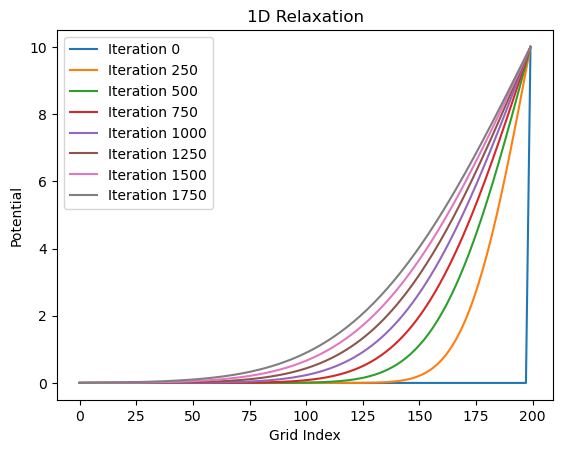

In [16]:
# Parameters
a = 1
dx = 0.005
grid_size = int(1/dx)
left_bc = 0
right_bc = 10
num_iterations = 2000
store_freq = 250

# Execution
grid = initialize_grid(grid_size)
grid = set_boundary_conditions(grid, left_bc, right_bc)
stored_iterations = run_relaxation(grid, num_iterations, store_freq)
plot_results(stored_iterations)

It definitely looks like it gets close to the exact solution. But how close? Let's plot the difference between the exact solution and the solution from our relaxation algorithm. The code below computes the exact solution and then plots the absolute value of the difference between the two at each point on the grid.

In [17]:
def compute_exact_solution(grid, left_bc, right_bc):
    x = np.linspace(0, len(grid)-1, len(grid))
    return left_bc + x * (right_bc - left_bc) / (len(grid)-1)

def plot_error(stored_iterations, exact_solution):
    
    # Plotting error
    final_result = stored_iterations[-1]
    error = np.abs(final_result - exact_solution)
    plt.plot(error, label="Error", color='red')
    plt.legend()
    plt.xlabel('Grid Index')
    plt.ylabel('Error')
    plt.title('Error in 1D Relaxation')
    plt.show()

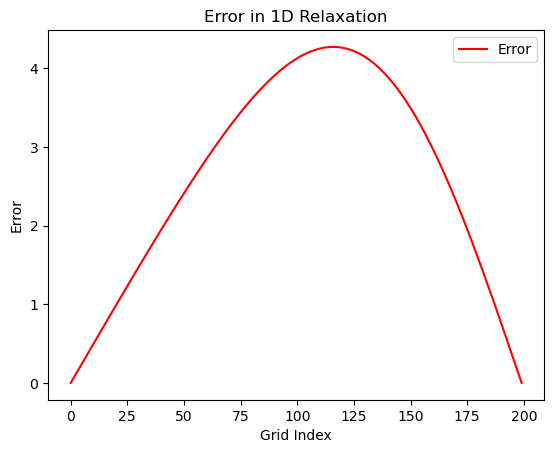

In [18]:
exact_solution = compute_exact_solution(grid, left_bc, right_bc)
plot_error(stored_iterations, exact_solution)

**&#9989; Do this**

1. Make sure you can run the code above and you have conceptual understanding of what it is doing. Test it and make sure it follows your intuition.
2. Modify the code to do a better job of predicting the exact solution. Get the maximum absolute error below 0.01, 0.001, 1e-4, 1e-5. How many iterations does it take to get to each of these values? 
3. Modify the code to stop when the maximum absolute error is below a value of your choosing. Did you include a `max_iterations` variable? If not, do so to avoid infinite loops.

## 2D Relaxation

The 2D relaxation code is very similar to the 1D code. One difference is that the grid has to be traversed in both directions. This means that you will need to move systematically through the 2D grid. The second is that you have to ensure the boundary conditions are set across the entire edge of the grid. 

We recommend breaking the approach into similar functions as above.

1. Initialize the 2D grid of a chosen size (we've done that for you)
2. Set the boundary conditions (here you want a functions that can set each edge to a value or array of values) *Hint: try using cases or if else to send edge information ('top', 'left') and then use the `:` with the correct index to set the values for a full row or column (e.g., V[:,0])*
3. Relax the grid (here you will need to loop through the grid in both directions)

We've started the code for you below. You will need to finish it.

In [19]:
def initialize_grid_2d(size):
    '''Initialize the grid of potential values'''
    return np.zeros((size, size))

def set_boundary(phi, edge, value):
    '''phi is the whole grid of potential values that you initialized
    edge is the edge of the grid that you want to set (top, bottom, left, right)
    value is the value you want to set the edge to (single number or array)'''

def relax(phi, N, tolerance, max_iterations=10000, store_frequency=1000):
    '''phi is the grid of potential values that you initialized
    after you set the boundary conditions. That is key!
    N is the size of the grid (assumed square
    tolerance is the stopping criterion - you control this; be careful
    max_iterations is the maximum number of iterations to run (stops loop if not converged)
    store_frequency is how often you want to store the phi values (for plotting)'''
    
    iterations = 0 ## Keep track of the number of iterations
    delta = 1.0 ## Initialize delta (error) to be larger than tolerance
    
    stored_phi = [] ## Keep track of phi values for plotting
    stored_deltas = []  ## Keep track of delta values for plotting
    
    ## Loop condition to run until convergence or max_iterations
    while delta > tolerance and iterations < max_iterations:
        # Store the old phi values to calculate delta later
        phi_old = phi.copy()
        
        ######################
        ### YOUR CODE HERE ###
        ######################
        
        # Calculate delta: max difference between new and old phi values
        delta = np.max(np.abs(phi - phi_old))
        
        ## Increment the iteration counter
        iterations += 1
        
        ## Store phi and delta values every store_frequency iterations
        if iterations % store_frequency == 0:
            stored_phi.append(phi.copy())
            stored_deltas.append(delta)
            print(f"Iteration: {iterations}, Delta: {delta}")
    
    return stored_phi, stored_deltas, iterations


**&#9989; Do this**

Finish the 2D relaxation code (below we've written up an example use case that it should work for)
1. You need to make sure the boundary conditions are set correctly
2. You need to traverse the grid and calculate the average of the neighboring points

It should be that once you have that working, the code below will run. You will need to plot it to see if it is working correctly.

In [20]:

# Example Usage
L = 1.0
h = 0.01
tolerance = 1e-5
N = int(L/h)

phi = initialize_grid_2d(N+1)

# Set varying potential on top boundary
x = np.linspace(0, L, N+1)
V_top = 10 * np.sin(2 * np.pi * x)
set_boundary(phi, 'top', V_top)

# Set constant potential on other boundaries
set_boundary(phi, 'bottom', 0)
set_boundary(phi, 'left', 5)
set_boundary(phi, 'right', 5)

# Relaxation
stored_phi, stored_deltas, iterations = relax(phi, N, tolerance)
print(f"Converged in {iterations} iterations.")


Converged in 1 iterations.


## What about Poisson's equation?

It turns out we can use a very similar approach when we have charges! Alia has written up a script that implements the relaxation approach for Poisson's equation. You can find it below along with the derivation.

$$\nabla^2 \phi = -\frac{\rho}{\epsilon_0}$$

Where $\rho$ is a **charge density**.

Substituting our 2nd partial derivative equations gives us:

$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}  = \frac{\phi(x+h,y) + \phi(x-h,y) - 2\phi(x,y) + \phi(x,y+h) + \phi(x,y-h) - 2\phi(x,y)}{h^2} = -\frac{\rho}{\epsilon_0}
$$

Which in turn gives us the update equation:

$$
\phi_{k+1}(x,y) = \frac{1}{4}\left[\phi_{k}(x+h,y) + \phi_{k}(x-h,y) + \phi_{k}(x,y+h) + \phi_{k}(x,y-h) \right] + \frac{h^2}{4\epsilon_0} \rho(x,y)
$$

We can implement this (warning: this takes a long time to converge).

iter: 1 delta: 0.28235825615541005
iter: 500 delta: 0.06832141135411973
iter: 1000 delta: 0.03251014051510026
iter: 1500 delta: 0.017114857647044346
1931


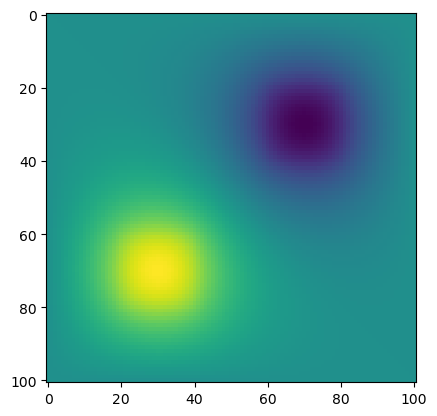

In [22]:
# constants and parameters
L = 1
h = 0.01
V = 1
N = int(L/0.01)
tol = 1e-2
epsilon0 = 8.854e-12

# setup phi, phiprime arrays
phi = np.zeros((N+1,N+1))
phiprime = np.copy(phi) # to play the part of phi (k+1)

def rho(i,j):
    x = i * h
    y = j * h
    if x >= 0.6 and x <= 0.8 and y >= 0.2 and y <= 0.4:
        return 1e-7
    elif x >= 0.2 and x <= 0.4 and y >= 0.6 and y <= 0.8:
        return -1e-7
    else:
        return 0.

k = 0 # track number of iterations
delta = 1.0 # initial delta

while delta > tol: # run until converged

    for i in range(N+1):
        for j in range(N+1):
            if i == 0 or i == N or j == 0 or  j == N: # don't update boundary
                phiprime[i,j] = phi[i,j]
            else:
                # relaxation update equation
                phiprime[i,j] = 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) + h**2 / (4 * epsilon0) * rho(i,j)

    # find max difference for delta
    delta = np.abs(phi-phiprime).max()

    # swap arrays to keep iterating
    phi,phiprime = phiprime,phi 
    
    # track iterations
    k += 1
    if k%500 == 0 or k ==1:
        print("iter:",k,"delta:",delta)         
    delta = np.abs(phi-phiprime).max()

print(k)
plt.imshow(phi)
plt.show()